url https://mathworld.wolfram.com/FourierSeriesSquareWave.html

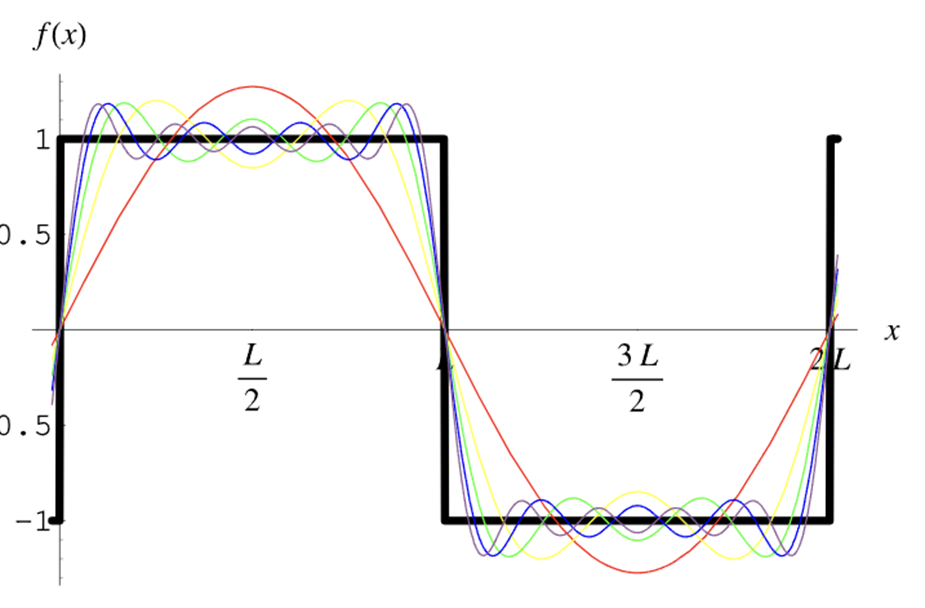

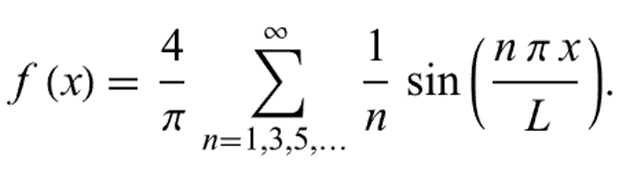

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc

In [77]:
M = 10
R = range(1, 2*M+1, 2)
f = [*R]
A = [4/(i*math.pi) for i in R]
print('f =', f)
print()
print('A =',np.round(A, 3))

f = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

A = [1.273 0.424 0.255 0.182 0.141 0.116 0.098 0.085 0.075 0.067]


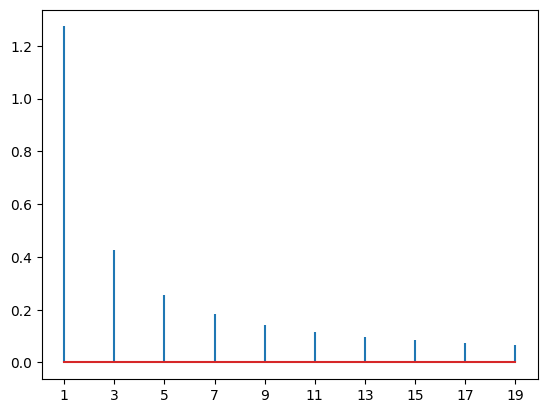

In [78]:
plt.stem(f, A, markerfmt='none')
plt.xticks(f)
plt.show()

In [176]:
N = 1000; tbeg = 0; tend = 1;
dt = (tend - tbeg) / N
t = np.linspace(tbeg, 1-dt, N)
xp = [+1 for i in range(N//2)]
xm = [-1 for i in range(N//2)]
x = xp + xm
print(np.round(t, 4))
print()
print(x)


[0.    0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009 0.01  0.011
 0.012 0.013 0.014 0.015 0.016 0.017 0.018 0.019 0.02  0.021 0.022 0.023
 0.024 0.025 0.026 0.027 0.028 0.029 0.03  0.031 0.032 0.033 0.034 0.035
 0.036 0.037 0.038 0.039 0.04  0.041 0.042 0.043 0.044 0.045 0.046 0.047
 0.048 0.049 0.05  0.051 0.052 0.053 0.054 0.055 0.056 0.057 0.058 0.059
 0.06  0.061 0.062 0.063 0.064 0.065 0.066 0.067 0.068 0.069 0.07  0.071
 0.072 0.073 0.074 0.075 0.076 0.077 0.078 0.079 0.08  0.081 0.082 0.083
 0.084 0.085 0.086 0.087 0.088 0.089 0.09  0.091 0.092 0.093 0.094 0.095
 0.096 0.097 0.098 0.099 0.1   0.101 0.102 0.103 0.104 0.105 0.106 0.107
 0.108 0.109 0.11  0.111 0.112 0.113 0.114 0.115 0.116 0.117 0.118 0.119
 0.12  0.121 0.122 0.123 0.124 0.125 0.126 0.127 0.128 0.129 0.13  0.131
 0.132 0.133 0.134 0.135 0.136 0.137 0.138 0.139 0.14  0.141 0.142 0.143
 0.144 0.145 0.146 0.147 0.148 0.149 0.15  0.151 0.152 0.153 0.154 0.155
 0.156 0.157 0.158 0.159 0.16  0.161 0.162 0.163 0.

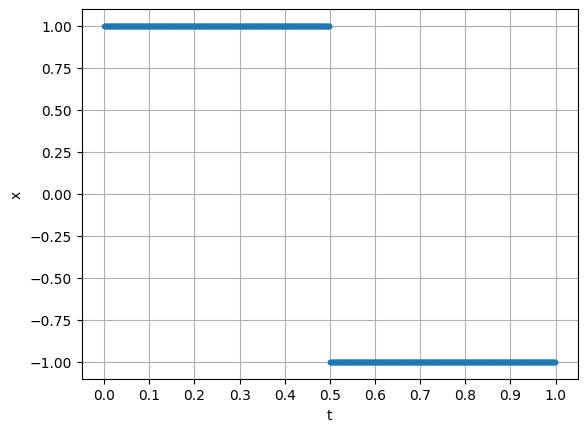

In [80]:
plt.plot(t, x, '.')
plt.xticks([0.1*i for i in range(11)])
plt.grid()
plt.xlabel('t')
plt.ylabel('x')
plt.show()

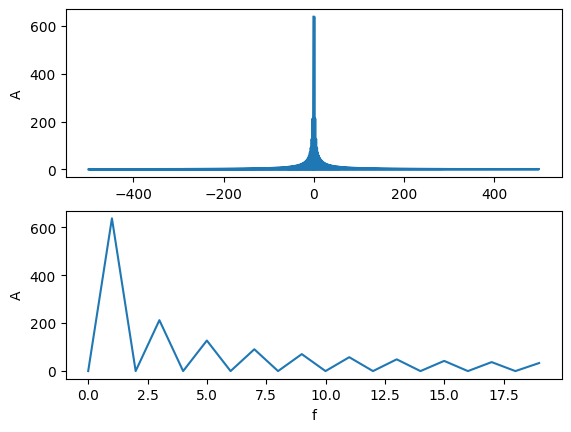

In [81]:
Af = np.abs(sc.fft.fft(x))
ff = sc.fft.fftfreq(N, dt)

plt.subplot(2, 1, 1)
plt.plot(ff, Af)
plt.ylabel('A')
plt.subplot(2, 1, 2)
plt.plot(ff[0:20], Af[0:20])
plt.ylabel('A')
plt.xlabel('f')
plt.show()

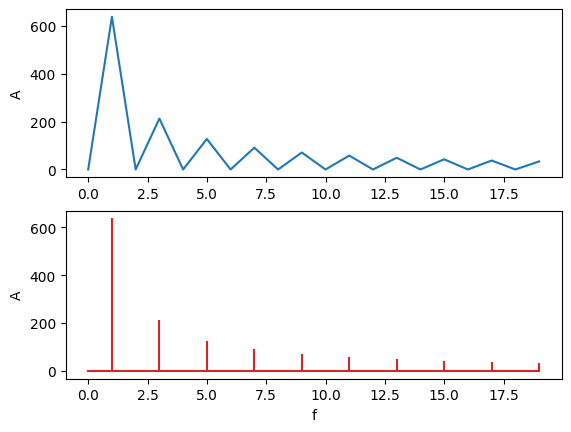

In [82]:
plt.subplot(2, 1, 1)
plt.plot(ff[0:20], Af[0:20])
plt.ylabel('A')
plt.subplot(2, 1, 2)
plt.stem(ff[0:20], Af[0:20],
  markerfmt='none', linefmt='tab:red')
plt.ylabel('A')
plt.xlabel('f')
plt.show()

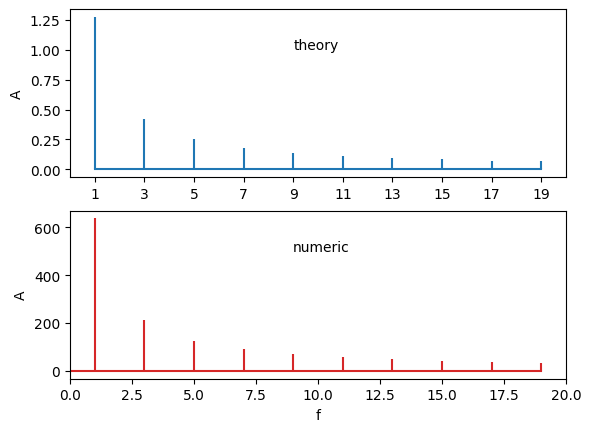

In [99]:
plt.subplot(2, 1, 1);
plt.stem(f, A, basefmt='tab:blue',
  markerfmt='none', linefmt='tab:blue')
plt.xticks(f); plt.xlim([0, 20])
plt.ylabel('A'); plt.text(9, 1, 'theory')
plt.subplot(2, 1, 2)
plt.stem(ff[0:20], Af[0:20],
  markerfmt='none', linefmt='tab:red')
plt.ylabel('A'); plt.xlim([0, 20]);
plt.xlabel('f'); plt.text(9, 500, 'numeric')
plt.show()

In [124]:
Af2 = [Af[i] for i in range(1, 20, 2)]
N = len(Af2)
print('Numeric\tTheory\tRatio')
for i in range(N):
    print(
        f'{Af2[i]:.2f}',
        f'{A[i]:.3f}',
        f'{Af2[i]/A[i]:.2f}',
        sep='\t'
    )

Numeric	Theory	Ratio
636.62	1.273	500.00
212.21	0.424	500.01
127.33	0.255	500.02
90.95	0.182	500.04
70.74	0.141	500.07
57.89	0.116	500.10
48.98	0.098	500.14
42.46	0.085	500.19
37.47	0.075	500.24
33.53	0.067	500.30


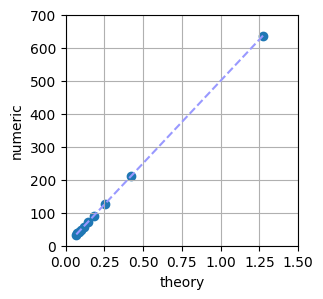

In [175]:
plt.figure(figsize=(3, 3))
plt.plot(A, Af2, color='#99f', ls='--')
plt.scatter(A, Af2, marker='o')
plt.xticks([0.25* i for i in range(7)])
plt.yticks([100*i for i in range(0, 8)])
plt.xlabel('theory')
plt.ylabel('numeric')
plt.grid()
plt.show()